In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
M = np.array( [[3,-1,-1],[-1,3,1],[2,1,4]] )
print(M)

[[ 3 -1 -1]
 [-1  3  1]
 [ 2  1  4]]


In [3]:
b = np.array([1,3,7])
print(b)

print(M.shape[1])

[1 3 7]
3


In [4]:
np.linalg.solve(M,b)

array([1., 1., 1.])

In [5]:
def GetJacobiMethod(Matrix, bvector, itmax, error):
    
    n = Matrix.shape[1]
    
    x = np.zeros(n)

    sumk = np.zeros(n)
    
    it = 0
    
    residuo = np.linalg.norm( bvector - np.dot(Matrix,x) ) # Metrica
    
    while residuo > error and it < itmax:
        
        it += 1
        
        for i in range(Matrix.shape[0]):
            sum_ = 0
            for j in range(Matrix.shape[1]):
                if i!=j:
                    sum_ += Matrix[i][j]*x[j]
                    
            sumk[i] = sum_
            
        for i in range(Matrix.shape[0]):
            
            if Matrix[i,i] !=0:
                x[i] = (bvector[i] - sumk[i])/Matrix[i,i]
            else:
                print('No invertirble con Jacobi')
                return
        
        
        #print(x)
        #print(residuo)
        residuo = np.linalg.norm( bvector - np.dot(Matrix,x) )    
    
    return x,it,residuo

In [6]:
Xsol, it, error = GetJacobiMethod(M,b,1000,1e-10)
print(Xsol)

[1. 1. 1.]


In [7]:
print(it)

23


In [8]:
def GetTMatrix(Matrix):
    
    n = Matrix.shape[1]
    
    D = np.zeros((n,n))
    R = np.zeros((n,n))
    T = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            if i == j:
                D[i,j] = 1/Matrix[i,i]
            else:
                R[i,j] = Matrix[i,j]
                
    T = np.dot(D,R)
    return T

In [9]:
T = GetTMatrix(M)
print(T)

[[ 0.         -0.33333333 -0.33333333]
 [-0.33333333  0.          0.33333333]
 [ 0.5         0.25        0.        ]]


In [10]:
valores, vectores = np.linalg.eig(T)

In [11]:
print(valores)

[-0.33333333+0.j          0.16666667+0.23570226j  0.16666667-0.23570226j]


In [12]:
print(np.amax(abs(valores)))

0.33333333333333315


In [13]:
IM = np.linalg.inv(M)
print(IM)

[[ 0.32352941  0.08823529  0.05882353]
 [ 0.17647059  0.41176471 -0.05882353]
 [-0.20588235 -0.14705882  0.23529412]]


In [14]:
np.round(np.dot(IM,M),3)

array([[ 1.,  0., -0.],
       [-0.,  1., -0.],
       [ 0.,  0.,  1.]])

In [15]:
# Definamos Gauss-Seidel
def GetGaussSeidelMethod(Matrix, bvector, itmax, error):
    
    n = Matrix.shape[1]
    x = np.zeros(n)
    
    r = np.linalg.norm( bvector - np.dot(Matrix,x) )
    it = 0
    
    while r > error and it < itmax:
        
        it += 1
        
        for i in range(Matrix.shape[0]):
            
            sum_ = 0.
            
            for j in range(Matrix.shape[0]):
                
                if i!=j:
                    sum_ += Matrix[i,j]*x[j]
                
            x[i] = (bvector[i]-sum_)/Matrix[i,i]
            
        print(x)
        r = np.linalg.norm( bvector - np.dot(Matrix,x) )
        
    return x,r,it

In [16]:
Xsol, error, it = GetGaussSeidelMethod(M, b, 100, 1e-10)
print(it)

[0.33333333 1.11111111 1.30555556]
[1.13888889 0.94444444 0.94444444]
[0.96296296 1.00617284 1.01697531]
[1.00771605 0.99691358 0.99691358]
[0.99794239 1.00034294 1.00094307]
[1.00042867 0.99982853 0.99982853]
[0.99988569 1.00001905 1.00005239]
[1.00002381 0.99999047 0.99999047]
[0.99999365 1.00000106 1.00000291]
[1.00000132 0.99999947 0.99999947]
[0.99999965 1.00000006 1.00000016]
[1.00000007 0.99999997 0.99999997]
[0.99999998 1.         1.00000001]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
18


In [17]:
x,y = np.linspace(0.,2.,5),np.linspace(0.,2.,5)
X,Y = np.meshgrid(x,y)
print(M)

[[ 3 -1 -1]
 [-1  3  1]
 [ 2  1  4]]


<IPython.core.display.Javascript object>


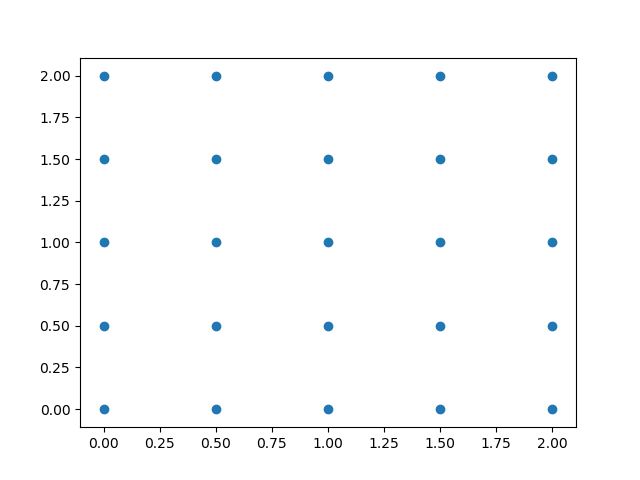

In [18]:
plt.scatter(X,Y)

In [19]:
Z1 = (b[0] - M[0,0]*X - M[0,1]*Y)/M[0,2]
Z2 = (b[1] - M[1,0]*X - M[1,1]*Y)/M[1,2]
Z3 = (b[2] - M[2,0]*X - M[2,1]*Y)/M[2,2]
print(Xsol)

[1. 1. 1.]


<IPython.core.display.Javascript object>


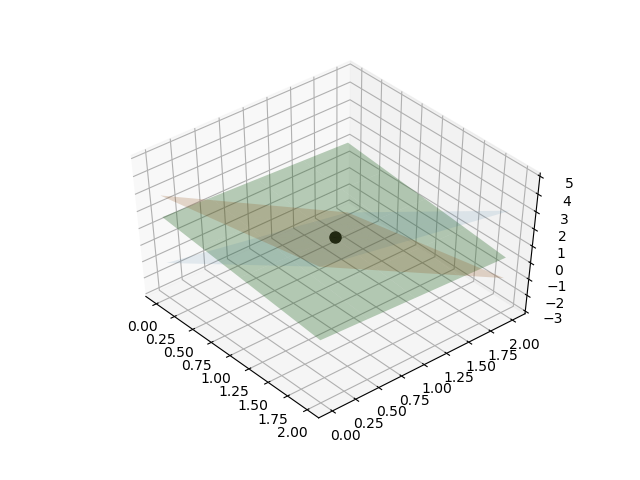

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z1,alpha=0.1)
ax.plot_surface(X,Y,Z2,alpha=0.2)
ax.plot_surface(X,Y,Z3,alpha=0.3)
ax.plot( (Xsol[0],),(Xsol[1],),(Xsol[2],), lw=2, c='k',marker='o',markersize=8  )

In [21]:
print(M,b)

[[ 3 -1 -1]
 [-1  3  1]
 [ 2  1  4]] [1 3 7]


# Método de eliminación Gaussiana

1. Diagonalizar la matriz con unos en la diagonal
2. Hacer la sustiución hacia atrás $ x_{i} = \frac{b_{i} - \sum_{j = i+1}^{n} a_{ij}x_{j}}{a_{ii}} $

In [27]:
def GetGaussJordan(M_,b_):
    
    A = M_.copy()
    b = b_.copy()
    
    A = np.float_(A)
    b = np.float_(b)
    
    n = len(b)
    
    for i in range(n):
        
       # a = A[i,i]
       # A[i,:] = A[i,:]/a # Dividir toda la fila por el diagonal
       # b[i] = b[i]/a
        
        #print(A)
        #print(b)
        
        for j in range(i+1,n):
            
            #a = M_[j,i]/M_[i,i]  
            
            a = A[j,i]/A[i,i]
            
            A[j,:] -= a*A[i,:]
            b[j] -= a*b[i]
           
    #x = np.zeros(n)
    x = b.copy()
    print(A)
    
    # Sustitucion hacia atrás!
    
    for i in reversed(range(n)):
        print(i)
        for j in range(i+1,n):
            print(x[i])
            x[i] = (x[i]-A[i,j]*x[j])/A[i,i]
    
    return x,A,b

In [28]:
Xsol1, NewM, Newb = GetGaussJordan(M,b)

[[ 3.         -1.         -1.        ]
 [ 0.          2.66666667  0.66666667]
 [ 0.          0.          4.25      ]]
2
1
3.3333333333333335
0
1.0
0.3958333333333333


In [24]:
print(Xsol1)

[1.54861111 0.1875     4.25      ]
